# SHARK QUEST
## New Kids On The Block



# TODO

- Pickle ?
- Column names?

## Selecting
- Select relevant columns
- Analyse relevant columns

## Cleaning :
- Cast to appropriate data types
    - General cleaning
        - identify duplicates
            - fuzzy
        - removing duplicates
            - remove
            - merge
        - handling null values
            - remove
            - replace
        - manipulating strings
        - formatting the data.

- Wrong inputs
- Outliers

## Hypothesis

### TIME
- Shark attacks are seasonal (Summer)
- Shark attacks are increasing 
- Shark attacks are more concentrated in the PM 

### LOCATION
- Some countries are more attack prone (Australia)
- Some countries are more likely to be fatal (Australia)


### DEMOGRAPHICS
- Males are more likely to get attacked
- Males are more likely to get provoke a shark
- Provoked attacked are more fatal
- Young persons are more likely to get attacked
- Old persons are more likely to get killed

- Names more likely to get attacked (John)

### OTHER
- Some species are more aggressive (Tiger Shark)
- Some activities are more likely (Surfing)
- Some activities are more fatal

- Full moon? 😂


Retained :
- Shark Species have a gender preference (score) => JP => Heinning
- Some countries are more provocative against sharks* => Ricardo
- Shark attacks are more concentrated in the PM => Linh

- Names more likely to get attacked (John) => JP?

## Business Ideas

- App that gives a likelyhood of attack based on location and time
- Vacations far away from sharks for phobics
- Witness attacks for masochists

- Surf school at the safest places / seasons
- Fishing supplies => shark repellant by activities
- Safety training to avoid provocations / live in harmony

- Shark repellant => best spots
- Insurance for surfers, premiums for high risk areas

### GENERAL CLEANING
1. Rename columns
2. Drop columns
3. Remove duplicates
    - Remove full dupes
    - Remove fuzzy search
4. Strip values
5. Reset Index

### SPECIFIC CLEANING
1. Search / Replace / Reformat strings
2. Merge categories
3. Cast to Null
4. Cast correct type
5. Create new columns


In [914]:
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [915]:
#import depedencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cleaning import *

In [916]:
# Load the data
shark_attacks_df = pd.read_excel('GSAF5.xls')
shark_attacks = shark_attacks_df.copy()

countries_df = pd.read_csv('country_coord.csv')
countries = countries_df.copy()

shark_attacks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",NaN,16h00,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",N,NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [917]:
# Settings
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', 100)

In [918]:
# Format all columns names
shark_attacks.columns = [col.strip().replace(" ", "_").replace(".", "").lower() for col in shark_attacks.columns]

In [919]:
# Functions

""" def merge_values(row, arg1, *args):
    if row in args:
        return arg1
    else:
        return row


def strip_values(df):
    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: x.strip() if isinstance(x, str) else x)
    return df


def replace_to_nan(series, keys, value=np.nan):


    return series.replace(keys, value, inplace=True)


def categorize_activity(activity):
    if pd.isna(activity):
        return "Invalid"

    activity = activity.lower()

    for pattern, label in categories:
        if re.search(pattern, activity):
            return label

    return "Other Activity"


def replace_string_patterns(value, replacements):

    if isinstance(value, str):

        for pattern, result in replacements:
            value = re.sub(pattern, result, value)
        return value

    else:

        return value
    
def dictionnary_from_json(json_filename):
    with open(json_filename+".json", "r") as json_file:
        data = json.load(json_file)
    return data """


' def merge_values(row, arg1, *args):\n    if row in args:\n        return arg1\n    else:\n        return row\n\n\ndef strip_values(df):\n    for col in df.columns:\n        df[col] = df[col].apply(\n            lambda x: x.strip() if isinstance(x, str) else x)\n    return df\n\n\ndef replace_to_nan(series, keys, value=np.nan):\n\n\n    return series.replace(keys, value, inplace=True)\n\n\ndef categorize_activity(activity):\n    if pd.isna(activity):\n        return "Invalid"\n\n    activity = activity.lower()\n\n    for pattern, label in categories:\n        if re.search(pattern, activity):\n            return label\n\n    return "Other Activity"\n\n\ndef replace_string_patterns(value, replacements):\n\n    if isinstance(value, str):\n\n        for pattern, result in replacements:\n            value = re.sub(pattern, result, value)\n        return value\n\n    else:\n\n        return value\n    \ndef dictionnary_from_json(json_filename):\n    with open(json_filename+".json", "r") as 

In [920]:
# Contract
data_schema = dictionnary_from_json('schema')

In [921]:
#Creating new columns
shark_attacks['severity'] = shark_attacks_df['Injury']

In [922]:
# Selecting columns
shark_attacks = shark_attacks[[col for col in data_schema]]
shark_attacks['species'].value_counts()


species
White shark                                                                                                                      194
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   92
Tiger shark                                                                                                                       89
                                                                                                                                ... 
1.2 m to 1.8 m [4' to 6'] shark                                                                                                    1
Grey nurse shark, 3 m female                                 

In [923]:
# Strip strings
shark_attacks = shark_attacks.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [924]:
#Handling missing values
shark_attacks.replace(['N/A', 'null', '--'], np.nan, inplace=True)

In [925]:
#Remove duplicates
shark_attacks.drop_duplicates(keep=False, inplace=True)

In [926]:
#Reset Index
shark_attacks.reset_index(inplace=True)

In [927]:
# Reformat values
replacements = dictionnary_from_json('replacements')

In [928]:

for col, values in replacements.items():
    shark_attacks[col] = shark_attacks[col].apply(
        replace_string_patterns, replacements=values)
shark_attacks['country']

0                AUSTRALIA
1                      USA
2                      USA
3                AUSTRALIA
4                    INDIA
               ...        
6931             AUSTRALIA
6932             AUSTRALIA
6933                   USA
6934                PANAMA
6935    CEYLON (SRI LANKA)
Name: country, Length: 6936, dtype: object

In [929]:
shark_attacks['country'] = shark_attacks['country'].apply(lambda x: x.lower() if isinstance(x, str) else x)
replace_to_nan(shark_attacks["country"], ["england","scotland"], "united kingdom")
replace_to_nan(shark_attacks["country"], ["usa", "hawaii"], "united states")
replace_to_nan(shark_attacks["country"], ["reunion"], "france")
replace_to_nan(shark_attacks["country"], ["columbia"], "colombia")
replace_to_nan(shark_attacks["country"], ["new guinea"], "papua new guinea")


# unify country, converts all low value "country" ocorrences into <NA>. Also sets Country as string-type
country_list = [x.lower() for x in countries['Country']]
shark_attacks["country"] = shark_attacks["country"].where(shark_attacks["country"].isin(country_list), np.nan)
shark_attacks['country'].value_counts()

country
united states       2532
australia           1481
south africa         598
papua new guinea     146
new zealand          145
                    ... 
guatemala              1
jordan                 1
mayotte                1
gabon                  1
djibouti               1
Name: count, Length: 113, dtype: int64

In [930]:
#Clean dates
shark_attacks['date'] = pd.to_datetime(shark_attacks['date'], errors='coerce')
shark_attacks['date'] = shark_attacks['date'].dt.strftime('%d-%m-%Y')
shark_attacks['date'] = shark_attacks['date'].ffill()

In [931]:
# Cast correct types
columns_types = {key: value['dtype'] for key, value in data_schema.items()}
shark_attacks = shark_attacks.astype(columns_types)
shark_attacks.dtypes

index                int64
type              category
date        datetime64[ns]
country     string[python]
state       string[python]
name        string[python]
location    string[python]
activity          category
severity          category
time              category
species           category
sex               category
dtype: object

In [932]:
shark_attacks['species'].value_counts()

species
GREAT WHITE SHARK                                               744
TIGER SHARK                                                     334
BULL SHARK                                                      216
BLACKTIP SHARK                                                  139
NURSE SHARK                                                     113
                                                               ... 
5.5' shark                                                        1
15 cm to 20 cm [6" to 8"] bite diameter just below left knee      1
5.5 ft shark                                                      1
15'                                                               1
“small brown shark”                                               1
Name: count, Length: 477, dtype: int64

In [933]:
# Clean categories
for column in shark_attacks.select_dtypes(include=['category']).columns:
    shark_attacks[column] = shark_attacks[column].astype('string')
    shark_attacks[column] = pd.Categorical(shark_attacks[column], categories=set(data_schema[column]['categories']), ordered=True)
    shark_attacks[column] = shark_attacks[column].where(shark_attacks[column].isin(data_schema[column]['categories']), other=data_schema[column]['categories'][-1])
    shark_attacks[column] = shark_attacks[column].astype('category')


In [934]:
#Add helper columns
shark_attacks['severity_score'] = shark_attacks['severity'].apply(lambda x: 3 if x == 'FATALITY' else 2 if x == 'INJURY' else 1)

In [935]:
#export to csv
#shark_attacks.to_csv('shark_attacks_cleaned.csv', index=False)
display(shark_attacks)

,index,type,date,country,state,name,location,activity,severity,time,species,sex,severity_score
0,0,UNPROVOKED,2024-01-03,australia,Queensland,Brooklyn Sauer,Bargara Beach,SWIMMING,INJURY,AFTERNOON,TIGER SHARK,FEMALE,2
1,1,UNPROVOKED,2024-01-03,united states,Hawaii,MALEatthew White,"Old Man's, Waikiki",SURFING,INJURY,UNKNOWN,TIGER SHARK,MALE,2
2,2,UNPROVOKED,2024-01-03,united states,Hawaii,<NA>,"Rainbows, Oahu",SWIMMING,INJURY,NOON,MYSTERY SHARK,FEMALE,2
3,3,UNPROVOKED,2024-01-02,australia,Western Australia,female,"Sandlnd Island, Jurian Bay",PASSIVE,INJURY,NOON,TIGER SHARK,FEMALE,2
4,4,UNPROVOKED,2024-01-02,india,Maharashtra,Vicky Suresh Govari,"Vaitarna River, Palghar District",FISHING,INJURY,UNKNOWN,BULL SHARK,MALE,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,6939,UNPROVOKED,1913-01-07,australia,Western Australia,male,Roebuck Bay,DIVING,FATALITY,UNKNOWN,MYSTERY SHARK,MALE,3
6932,6940,UNPROVOKED,1913-01-07,australia,Western Australia,Ahmun,<NA>,DIVING,FATALITY,UNKNOWN,MYSTERY SHARK,MALE,3
6933,6941,UNPROVOKED,1913-01-07,united states,North Carolina,Coast Guard personnel,Ocracoke Inlet,SWIMMING,FATALITY,UNKNOWN,MYSTERY SHARK,MALE,3
6934,6942,UNPROVOKED,1913-01-07,panama,<NA>,Jules Patterson,"Panama Bay 8ºN, 79ºW",PASSIVE,FATALITY,UNKNOWN,MYSTERY SHARK,MALE,3


In [936]:
shark_attacks_clean = shark_attacks.copy()
shark_attacks_clean

,index,type,date,country,state,name,location,activity,severity,time,species,sex,severity_score
0,0,UNPROVOKED,2024-01-03,australia,Queensland,Brooklyn Sauer,Bargara Beach,SWIMMING,INJURY,AFTERNOON,TIGER SHARK,FEMALE,2
1,1,UNPROVOKED,2024-01-03,united states,Hawaii,MALEatthew White,"Old Man's, Waikiki",SURFING,INJURY,UNKNOWN,TIGER SHARK,MALE,2
2,2,UNPROVOKED,2024-01-03,united states,Hawaii,<NA>,"Rainbows, Oahu",SWIMMING,INJURY,NOON,MYSTERY SHARK,FEMALE,2
3,3,UNPROVOKED,2024-01-02,australia,Western Australia,female,"Sandlnd Island, Jurian Bay",PASSIVE,INJURY,NOON,TIGER SHARK,FEMALE,2
4,4,UNPROVOKED,2024-01-02,india,Maharashtra,Vicky Suresh Govari,"Vaitarna River, Palghar District",FISHING,INJURY,UNKNOWN,BULL SHARK,MALE,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,6939,UNPROVOKED,1913-01-07,australia,Western Australia,male,Roebuck Bay,DIVING,FATALITY,UNKNOWN,MYSTERY SHARK,MALE,3
6932,6940,UNPROVOKED,1913-01-07,australia,Western Australia,Ahmun,<NA>,DIVING,FATALITY,UNKNOWN,MYSTERY SHARK,MALE,3
6933,6941,UNPROVOKED,1913-01-07,united states,North Carolina,Coast Guard personnel,Ocracoke Inlet,SWIMMING,FATALITY,UNKNOWN,MYSTERY SHARK,MALE,3
6934,6942,UNPROVOKED,1913-01-07,panama,<NA>,Jules Patterson,"Panama Bay 8ºN, 79ºW",PASSIVE,FATALITY,UNKNOWN,MYSTERY SHARK,MALE,3


In [937]:
shark_attacks['species'].value_counts(dropna=False)

species
MYSTERY SHARK         4742
GREAT WHITE SHARK      744
TIGER SHARK            334
BULL SHARK             216
BLACKTIP SHARK         139
NURSE SHARK            113
WHALER SHARK            78
BLUE SHARK              61
REEF SHARK              61
MAKO SHARK              57
WOBBEGONG SHARK         55
HAMMERHEAD SHARK        49
LEMON SHARK             44
RAGGEDTOOTH SHARK       44
ZAMBEZI SHARK           32
SANDBAR SHARK           26
SEVENGILL SHARK         24
SPINNER SHARK           24
DUSKY SHARK             12
GREY SHARK              11
GALAPAGOS SHARK          9
CARPET SHARK             8
BASKING SHARK            7
ANGEL SHARK              7
PORBEAGLE SHARK          6
COOKIECUTTER SHARK       6
COPPER SHARK             5
SILKY SHARK              4
SALMON SHARK             4
SHOVELNOSE SHARK         3
THRESHER SHARK           3
GOBLIN SHARK             2
COW SHARK                2
LEOPARD SHARK            2
BONITA SHARK             1
EPAULETTE SHARK          1
WHITETIP SHARK      

In [938]:
#Hypothesis: Shark attacks are more concentrated in the PM 
time_stats = shark_attacks['time'].cat.remove_categories('UNKNOWN')

time_counts = time_stats.value_counts()
time_counts


time
NOON         1314
AFTERNOON     941
MORNING       761
DUSK          181
NIGHT         104
DAWN           82
Name: count, dtype: int64

In [939]:

df_time = pd.DataFrame(
    {'Time Category': time_counts.index,
     'Number of Attacks': time_counts.values  
    }
)
df_time

,Time Category,Number of Attacks
0,NOON,1314
1,AFTERNOON,941
2,MORNING,761
3,DUSK,181
4,NIGHT,104
5,DAWN,82


/var/folders/7w/s5bmwwgs2176bk3y33c2nv2m0000gn/T/ipykernel_37123/1071584036.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time Category', y='Number of Attacks', data=df_time, palette='Blues')


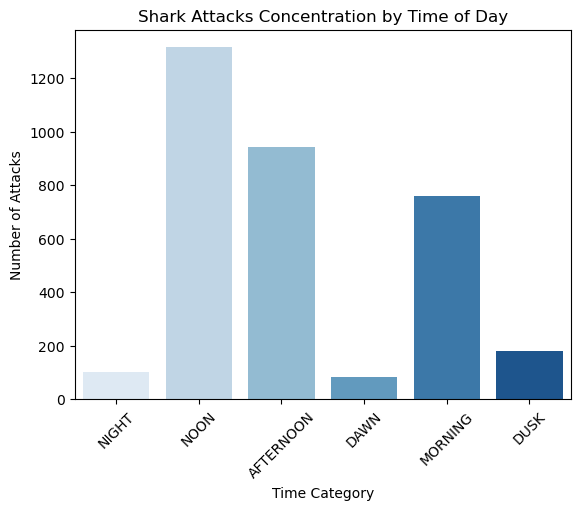

In [940]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Time Category', y='Number of Attacks', data=df_time, palette='Blues')
plt.title('Shark Attacks Concentration by Time of Day')
plt.xlabel('Time Category')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

In [941]:
#Conclusion: we could easily determine that shark attacks are most concentrated during NOON based on the dataset.

# ARCHIVE

In [942]:
# Hennings functions
# Merge categories : (*categories to be merged, target) - Henning


""" shark_attacks['type'] = shark_attacks['type'].apply(merge_values, args=(
    "Invalid", "Questionable", "Unconfirmed", "?", 'Unverified', 'Under investigation'))
shark_attacks['type'] = shark_attacks['type'].apply(
    merge_values, args=("Provoked", " Provoked"))
shark_attacks['type'] = shark_attacks['type'].apply(
    merge_values, args=("Watercraft", "Boat"))  """


' shark_attacks[\'type\'] = shark_attacks[\'type\'].apply(merge_values, args=(\n    "Invalid", "Questionable", "Unconfirmed", "?", \'Unverified\', \'Under investigation\'))\nshark_attacks[\'type\'] = shark_attacks[\'type\'].apply(\n    merge_values, args=("Provoked", " Provoked"))\nshark_attacks[\'type\'] = shark_attacks[\'type\'].apply(\n    merge_values, args=("Watercraft", "Boat"))  '

In [943]:
# Linh functions
# Strip function : strips spaces - Linh


In [944]:
""" df_cleaned['location'] = df_cleaned['location'].astype(str)


def clean_data(location):
    location = re.sub(r'\d{1,2}º[NS],\s*\d{1,3}º[EW]', '', location)
    location = re.sub(r'\(.*?\)', '', location)
    location = re.sub(r'\s+', ' ', location)
    return location.title()


df_cleaned['location'] = df_cleaned['location'].apply(clean_data)
df_cleaned['location'].head(1000) """

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/7w/s5bmwwgs2176bk3y33c2nv2m0000gn/T/ipykernel_37123/1494568874.py:1: SyntaxWarning: invalid escape sequence '\d'
  """ df_cleaned['location'] = df_cleaned['location'].astype(str)


" df_cleaned['location'] = df_cleaned['location'].astype(str)\n\n\ndef clean_data(location):\n    location = re.sub(r'\\d{1,2}º[NS],\\s*\\d{1,3}º[EW]', '', location)\n    location = re.sub(r'\\(.*?\\)', '', location)\n    location = re.sub(r'\\s+', ' ', location)\n    return location.title()\n\n\ndf_cleaned['location'] = df_cleaned['location'].apply(clean_data)\ndf_cleaned['location'].head(1000) "

In [945]:
""" categories = [
    (r"swimming|wading", "Swimming"),
    (r"surf|boogie boarding|paddle|foil", "Surfing"),
    (r"fish|fishing|spearfish|kayak", "Fishing"),
    (r"diving|scuba|freediving|snorkel", "Diving"),
    (r"sit|stand", "Passive"),
] """




""" df_cleaned['activity'] = df_cleaned['activity'].apply(categorize_activity)
df_cleaned.head(100) """

" df_cleaned['activity'] = df_cleaned['activity'].apply(categorize_activity)\ndf_cleaned.head(100) "

In [946]:
# Ricardo functions
# Replace as Nan, Nat, ... function - Ricardo
# Remove obvious duplicate (entire line) - Ricardo
# Remove fuzzy duplicates (case number? dates?) - Ricardo

""" replace_to_nan(shark_attacks["Name"].fillna(np.nan).str.strip(),['male', 'female'],np.nan)
shark_attacks """

' replace_to_nan(shark_attacks["Name"].fillna(np.nan).str.strip(),[\'male\', \'female\'],np.nan)\nshark_attacks '

In [947]:
# Jp functions

# replacements
""" replacements_test_species = [
    (r'^.*([Tt]iger).*$', 'TIGER SHARK'),
]



replacements_test_time = [
    (r'^.*((0[0-2]|23)h|([nN]ight|[dD]ark)).*$', 'NIGHT'),
    (r'^.*((0[3-6])h|([dD]awn|[sS]unrise|[dD]aybreak)).*$', 'DAWN'),
    (r'^.*((0[7-9]|10)h.*$|([mM]orning|^[aA]\.?[mM])).*$', 'MORNING'),
    (r'^.*((1[1-4])h.*$|([nN]oon|[mM]idday|[lL]unch)).*$', 'NOON'),
    (r'^.*((1[5-8])h.*$|([aA]fternoon|^[pP]\.?[mM])).*$', 'AFTERNOON'),
    (r'^.*((19|2[0-2])h.*$|([dD]usk|[sS]unset|[eE]vening)).*$', 'DUSK'),
] """

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/var/folders/7w/s5bmwwgs2176bk3y33c2nv2m0000gn/T/ipykernel_37123/68318399.py:4: SyntaxWarning: invalid escape sequence '\.'
  """ replacements_test_species = [


" replacements_test_species = [\n    (r'^.*([Tt]iger).*$', 'TIGER SHARK'),\n]\n\n\n\nreplacements_test_time = [\n    (r'^.*((0[0-2]|23)h|([nN]ight|[dD]ark)).*$', 'NIGHT'),\n    (r'^.*((0[3-6])h|([dD]awn|[sS]unrise|[dD]aybreak)).*$', 'DAWN'),\n    (r'^.*((0[7-9]|10)h.*$|([mM]orning|^[aA]\\.?[mM])).*$', 'MORNING'),\n    (r'^.*((1[1-4])h.*$|([nN]oon|[mM]idday|[lL]unch)).*$', 'NOON'),\n    (r'^.*((1[5-8])h.*$|([aA]fternoon|^[pP]\\.?[mM])).*$', 'AFTERNOON'),\n    (r'^.*((19|2[0-2])h.*$|([dD]usk|[sS]unset|[eE]vening)).*$', 'DUSK'),\n] "

In [948]:
# Source, PDF, Case Number as possible duplicate finder or year / date fill
relevant_columns = ['date', 'Year', 'type', 'country', 'state', 'location', 'activity',
                    'Name', 'Sex', 'Age', 'injury', 'time', 'Species', 'Source', 'pdf', 'href formula', 'href']
business_relevant_columns = ['date', 'type', 'country',
                             'state', 'location', 'activity', 'injury', 'time']

# Henning : Date, Type
# Ricardo : Country, State
# Linh : Location, Activity
# Jp : Injury, Time

# Type : category : Merge some columns based on categories. Trim labels. Nan into invalid. Final => Provoked, Unprovoked, Invalid
# Date : datetime : Clean "Reported" - Harmonize Format - Cast weird into NaT. Final => Dates (as datetime), NaT
# Country : string : Strip spaces - Formatting - Replace weird characters - cast weird values as NaN => Strings, Nan
# State : string : Strip spaces - Formatting - Replace weird characters - cast weird values as NaN => Strings, Nan
# Location : string : Strip spaces - Formatting - Replace weird characters - cast weird values as NaN => Strings, Nan
# Activity : category : Merge some columns based on categories. Trim labels. Nan into invalid. Final => Few categories to be determined
# Injury : category : Merge columns based on keywords. Nan into other. Final => Fatality, Injury, Other
# Time : category : Cast into categories Final => morning (6-10) noon (10-14) afternoon( 14-18) dusk (18-22) night (22 - 2) dawn (2-6) maybe as integers (0-5)

""" display(time_replace_test.value_counts())
where_test = time_replace_test.where(time_replace_test.isin(valid_categories))
where_test = where_test.astype('category')
where_test """

" display(time_replace_test.value_counts())\nwhere_test = time_replace_test.where(time_replace_test.isin(valid_categories))\nwhere_test = where_test.astype('category')\nwhere_test "

In [949]:
# Source, PDF, Case Number as possible duplicate finder or year / date fill
relevant_columns = ['date', 'Year', 'type', 'country', 'state', 'location', 'activity',
                    'Name', 'Sex', 'Age', 'injury', 'time', 'Species', 'Source', 'pdf', 'href formula', 'href']
business_relevant_columns = ['date', 'type', 'country',
                             'state', 'location', 'activity', 'injury', 'time']

# Henning : Date, Type
# Ricardo : Country, State
# Linh : Location, Activity
# Jp : Injury, Time

# Type : category : Merge some columns based on categories. Trim labels. Nan into invalid. Final => Provoked, Unprovoked, Invalid
# Date : datetime : Clean "Reported" - Harmonize Format - Cast weird into NaT. Final => Dates (as datetime), NaT
# Country : string : Strip spaces - Formatting - Replace weird characters - cast weird values as NaN => Strings, Nan
# State : string : Strip spaces - Formatting - Replace weird characters - cast weird values as NaN => Strings, Nan
# Location : string : Strip spaces - Formatting - Replace weird characters - cast weird values as NaN => Strings, Nan
# Activity : category : Merge some columns based on categories. Trim labels. Nan into invalid. Final => Few categories to be determined
# Injury : category : Merge columns based on keywords. Nan into other. Final => Fatality, Injury, Other
# Time : category : Cast into categories Final => morning (6-10) noon (10-14) afternoon( 14-18) dusk (18-22) night (22 - 2) dawn (2-6) maybe as integers (0-5)

# Todo
# Remove obvious duplicate (entire line) - Ricardo
# Remove fuzzy duplicates (case number? dates?) - Ricardo

# Functions :
# Merge categories : (*categories to be merged, target) - Henning
# Strip function : strips spaces - Linh
# Replace as Nan, Nat, ... function - Ricardo
# DONE - Replace by keyword function - Jp
# DONE - Cast to dateTime function
# Matching function (find similarities, keyword based?)
# DONE - Reformat dates, strings
# Filter function

In [950]:
shark_attacks['Name'].value_counts()


def get_fname(row):
    return str(row).split()[0]


shark_attacks['first_name'] = shark_attacks['Name'].apply(get_fname)

shark_attacks['first_name'].value_counts().head(50)

KeyError: 'Name'

### INJURY

## Problems
- Some are non-human damages (boat, kayak, boards)
- Some are non injuries (touched shark)
- Some don't have details
- Fatalities flags are non consistent
- Some incident are post-mortem
- Some are not incidents ('Aboriginal rock carving depicts man being attacked by a shark')
- Nan

## Additional
- Some provoked details that could be useful if missing elsewhere

## Solutions
- 3 categories : 
    - Fatality
    - Injury
    - Other

- Keyword(s) based search / replace ?

### TIME

## Problems
- Lots of Nan
- Some are times (12h00,...), other are time of day (morning,...)
- Some are text
- Some are ranges
- Some are calculations
- Some are 12h based, other 24h based
- Some maybe duplicates 
- Some are misplaced data

## Solutions
- 2 types :
    - Time (int? str?)
    - Unknown / NaN / None
